In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import glob
from datetime import datetime as dt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 999) 

In [4]:
files = glob.glob('SF/*.gz')

In [5]:
files

['SF/SF_05_04_2015_listings.gz',
 'SF/SF_12_03_2016_listings.gz',
 'SF/SF_06_02_2016_listings.gz',
 'SF/SF_08_02_2017_listings.gz',
 'SF/SF_11_02_2016_listings.gz',
 'SF/SF_09_02_2015_listings.gz',
 'SF/SF_02_02_2016_listings.gz',
 'SF/SF_04_03_2016_listings.gz',
 'SF/SF_08_02_2016_listings.gz',
 'SF/SF_03_02_2017_listings.gz',
 'SF/SF_05_02_2017_listings.gz',
 'SF/SF_11_01_2017_listings.gz',
 'SF/SF_02_02_2017_listings.gz',
 'SF/SF_09_02_2017_listings.gz',
 'SF/SF_09_02_2016_listings.gz',
 'SF/SF_12_02_2017_listings.gz',
 'SF/SF_11_08_2017_listings.gz',
 'SF/SF_10_02_2017_listings.gz',
 'SF/SF_12_02_2015_listings.gz',
 'SF/SF_01_01_2017_listings.gz',
 'SF/SF_05_02_2016_listings.gz',
 'SF/SF_07_02_2017_listings.gz',
 'SF/SF_04_02_2017_listings.gz',
 'SF/SF_12_07_2017_listings.gz',
 'SF/SF_06_02_2017_listings.gz']

In [10]:
df_sf = pd.concat([pd.read_csv(fp, parse_dates = ['calendar_last_scraped','last_scraped', 'first_review', 'last_review']) for fp in files], ignore_index=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [12]:
pd.options.display.float_format = '{:.4f}'.format

In [30]:
df_sf_2017['monthly_price'].replace('[\$,]', '', regex=True, inplace=True)
df_sf_2017['monthly_price'] = df_sf_2017.price.astype(float) ##

In [34]:
pd.set_option("display.max_columns",999)

In [62]:
df_sf_2017.review_scores_rating.fillna(value=9, inplace=True)

In [64]:
df_sf_2017[df_sf_2017.review_scores_rating ==130]

,access,access_filled,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guest_per_bed,guest_per_bedroom,guests_included,has_availability,host_about,host_about_filled,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_picture_url_filled,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,house_rules,house_rules_filled,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,log_price,longitude,market,maximum_nights,medium_url,minimum_nights,month,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,popular,price,price_actual,price_per_bedroom,price_per_guest,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,space_filled,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,year,zipcode
100003,None,False,4,"{""Cable TV"",""Wireless Internet"",Kitchen,Heatin...",0,0,0,0,1.5,Real Bed,2,2,1,1485993600000,13 months ago,flexible,San Francisco,$0.00,United States,US,"This is a beautiful, 2 story Victorian apartme...",none,0,NaN,0.500000,0.500000,1,None,None,False,NaN,t,5800451,t,f,1.0,"San Francisco, California, United States",Chris,Noe Valley,https://a0.muscache.com/im/pictures/c7c8b6be-6...,True,None,None,2013-04-06,https://a0.muscache.com/im/pictures/c7c8b6be-6...,1.0,https://www.airbnb.com/users/show/5800451,"['email', 'phone', 'reviews', 'jumio', 'selfie...",None,False,10638176,f,None,None,t,SAN FRANCISCO,NaN,1485993600000,37.750977,None,https://www.airbnb.com/rooms/10638176,7.313220,-122.430846,San Francisco,1125,https://a0.muscache.com/im/pictures/bae33a25-9...,1,2,None,"SB50! Huge, Sunny Noe Valley 2BR",None,Noe Valley,Noe Valley,NaN,None,0,https://a0.muscache.com/im/pictures/bae33a25-9...,False,1500,1500,3.656610,3.656610,Apartment,f,f,f,NaN,NaN,NaN,NaN,NaN,130.0,NaN,0.00,Entire home/apt,20170202135808,None,"San Francisco, CA",None,False,NaN,CA,"Noe Street, San Francisco, CA 94114, United St...","This is a beautiful, 2 story Victorian apartme...",https://a0.muscache.com/im/pictures/bae33a25-9...,None,None,https://a0.muscache.com/im/pictures/bae33a25-9...,2017,94114
100004,None,False,2,"{""Smoke detector"",""Carbon monoxide detector"",""...",0,0,0,0,0.0,Real Bed,1,1,3,1485993600000,2 months ago,flexible,San Francisco,35,United States,US,The house is open and inviting. Guests have a...,none,0,NaN,1.000000,1.000000,1,None,"Long time resident of San Francisco, we have k...",True,NaN,t,13005900,t,f,4.0,"San Francisco, California, United States",Olivier And Alexandra,Noe Valley,https://a0.muscache.com/im/users/13005900/prof...,True,100%,within an hour,2014-03-10,https://a0.muscache.com/im/users/13005900/prof...,4.0,https://www.airbnb.com/users/show/13005900,"['email', 'phone', 'reviews', 'kba']",None,False,8484211,f,None,None,t,SAN FRANCISCO,NaN,1485993600000,37.747289,None,https://www.airbnb.com/rooms/8484211,4.976734,-122.438238,San Francisco,20,https://a0.muscache.com/im/pictures/107857066/...,2,2,None,Unique Private Room in Noe Valley,None,Noe Valley,Noe Valley,NaN,None,0,https://a0.muscache.com/im/pictures/107857066/...,False,110,145,4.976734,2.488367,House,f,f,f,NaN,NaN,NaN,NaN,NaN,130.0,NaN,0.00,P

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


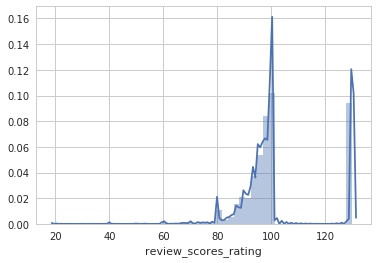

In [63]:
sns.distplot(df_sf_2017.review_scores_rating)

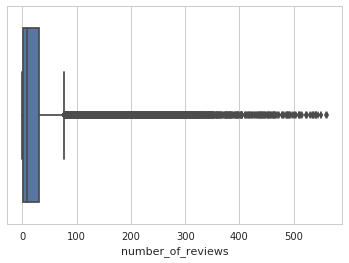

In [37]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df_sf_2017["number_of_reviews"])

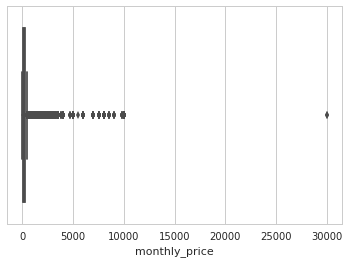

In [31]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df_sf_2017["monthly_price"])

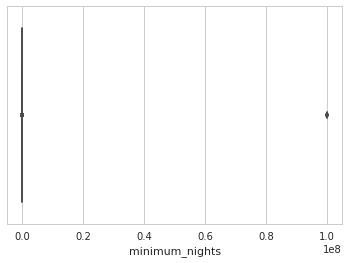

In [23]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df_sf_2017["minimum_nights"])

TypeError: cannot perform reduce with flexible type

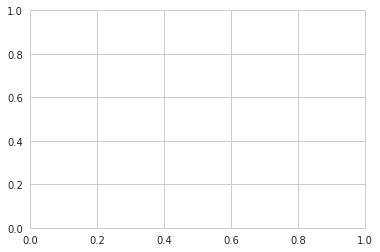

In [22]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=df_sf_2017["cleaning_fee"])

In [25]:
df_sf_2017.cleaning_fee.value_counts()

$0.00     28810
50.0      10060
100.0      9659
150.0      5595
75.0       5524
25.0       5363
30.0       3913
60.0       3669
80.0       3502
40.0       3253
20.0       3251
35.0       2487
125.0      2307
200.0      2050
120.0      1735
45.0       1727
70.0       1643
90.0       1628
10.0       1530
85.0       1483
15.0       1423
65.0       1422
95.0       1154
0.0        1053
250.0       877
55.0        854
99.0        780
175.0       773
110.0       517
140.0       445
          ...  
6.0           4
334.0         4
169.0         4
167.0         4
370.0         3
270.0         3
11.0          3
196.0         3
26.0          3
61.0          3
395.0         2
14.0          2
249.0         2
2500.0        2
161.0         2
311.0         2
13.0          1
288.0         1
171.0         1
16.0          1
1082.0        1
1073.0        1
1064.0        1
177.0         1
675.0         1
1058.0        1
355.0         1
131.0         1
93.0          1
335.0         1
Name: cleaning_fee, Leng

In [27]:
df_sf_2017["minimum_nights"].value_counts().sort_index()

1            37128
2            33721
3            21329
4             6528
5             4535
6              950
7             3431
8              110
9               73
10             570
11              14
12              86
13              73
14             686
15             305
16              15
17              23
18              22
20             183
21             209
22              37
23               1
24              23
25             125
26               1
27              55
28             133
29             134
30            6006
31             298
32             162
37               2
40               2
59               1
60              43
61               2
70               1
80               6
89              12
90              74
100              7
120             13
140             14
150              1
180             37
183              3
185              2
190             11
240              4
300              2
365             16
500             21
999         

In [20]:
df_sf_2017[df_sf_2017["price"]>20000]

,access,access_filled,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guest_per_bed,guest_per_bedroom,guests_included,has_availability,host_about,host_about_filled,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_picture_url_filled,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,house_rules,house_rules_filled,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,log_price,longitude,market,maximum_nights,medium_url,minimum_nights,month,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,popular,price,price_actual,price_per_bedroom,price_per_guest,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,space_filled,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,year,zipcode
201250,None,False,1,{},29,88,59,88,1.0000,Real Bed,1,1,1,1496361600000,2 days ago,flexible,San Francisco,$0.00,United States,US,qqq,none,0,nan,1.0000,1.0000,1,None,I'm from San Francisco.,True,nan,t,12101646,t,f,10.0000,"San Francisco, California, United States",Kidai,Union Square,https://a0.muscache.com/im/pictures/4ba9d595-2...,True,None,None,2014-02-10,https://a0.muscache.com/im/pictures/4ba9d595-2...,10.0000,https://www.airbnb.com/users/show/12101646,"['email', 'phone', 'reviews', 'jumio', 'offlin...",None,False,18448377,t,None,None,t,SAN FRANCISCO,nan,1496361600000,37.7795,None,https://www.airbnb.com/rooms/18448377,10.3090,-122.4039,San Francisco,1125,https://a0.muscache.com/im/pictures/666330c6-3...,1,6,None,fadsfq,None,SoMa,South of Market,nan,None,0,https://a0.muscache.com/im/pictures/666330c6-3...,False,30000,30000,10.3090,5.1545,Apartment,f,f,f,nan,nan,nan,nan,nan,nan,nan,0.0000,Entire home/apt,20170601201547,None,"San Francisco, CA",None,False,nan,CA,"SoMa, San Francisco, CA 94103, United States",qqq,https://a0.muscache.com/im/pictures/666330c6-3...,None,None,https://a0.muscache.com/im/pictures/666330c6-3...,2017,94103
85874,None,False,1,{},28,88,58,88,1.0000,Real Bed,1,1,1,1493769600000,6 days ago,flexible,San Francisco,$0.00,United States,US,qqq,none,0,nan,1.0000,1.0000,1,None,None,False,nan,t,12101646,t,f,11.0000,"San Francisco, California, United States",Kidai,Union Square,https://a0.muscache.com/im/pictures/4ba9d595-2...,True,100%,within an hour,2014-02-10,https://a0.muscache.com/im/pictures/4ba9d595-2...,11.0000,https://www.airbnb.com/users/show/12101646,"['email', 'phone', 'reviews', 'kba', 'work_ema...",None,False,18448377,t,None,None,t,SAN FRANCISCO,nan,1493769600000,37.7795,None,https://www.airbnb.com/rooms/18448377,10.3090,-122.4039,San Francisco,1125,https://a0.muscache.com/im/pictures/666330c6-3...,1,5,None,fadsfq,None,SoMa,South of Market,nan,None,0,https://a0.muscache.com/im/pictures/666330c6-3...,False,30000,30000,10.3090,5.1545,Apartment,f,f,f,nan,nan,nan,nan,nan,nan,nan,0.0000,Entire home/apt,20170502132049,None,"San Francisco, CA",None,False,nan,CA,"SoMa, San Francisco, CA 94103, United States",qqq,https://a0.muscache.com/im/pictures/666330c6-3...,None,None,https://a0.muscache.com/im/pictures/666330c6-3...,2017,94103.0000


In [11]:
df_sf = df_sf[(df_sf['reviews_per_month'].notnull()) | ((df_sf['number_of_reviews']== 0) & (df_sf['reviews_per_month'].isnull()))]

In [12]:
df_sf.reviews_per_month.fillna(value=0, inplace=True)

In [13]:
df_sf.loc[df_sf.host_about.notnull(), 'host_about_filled'] = True
df_sf.loc[df_sf.host_about.isnull(), 'host_about_filled'] = False

In [14]:
df_sf.loc[df_sf.host_picture_url.notnull(), 'host_picture_url_filled'] = True
df_sf.loc[df_sf.host_picture_url.isnull(), 'host_picture_url_filled'] = False

In [15]:
df_sf['year'] = df_sf.calendar_last_scraped.apply(lambda x: x.year)
df_sf_2017 = df_sf[df_sf['year']==2017]
df_sf_2016 = df_sf[df_sf['year']==2016]
df_sf_2015 = df_sf[df_sf['year']==2015]

In [23]:
df_sf_2017 = df_sf_2017.sort_values(by=['calendar_last_scraped'])

In [27]:
len(df_sf_2017)

117421

In [32]:
df_sf_2017.drop_duplicates(subset=['host_id','id'], keep = 'last', inplace=True)

In [33]:
len(df_sf_2017)

14160

f    8580
t    1413
Name: is_business_travel_ready, dtype: int64

In [34]:
top_twenty_2017 = len(df_sf_2017)*.2
top_twenty_2017

2832.0

In [39]:
top_twenty_2016 = len(df_sf_2016)*.2
top_twenty_2016

13607.0

In [36]:
top_twenty_2015 = len(df_sf_2015)*.2
top_twenty_2015

3790.2000000000003

In [37]:
df_sf_2017.sort_values(by='reviews_per_month', ascending=False).iloc[2832,:]

access                                                                            NaN
accommodates                                                                        1
amenities                           {TV,"Wireless Internet",Kitchen,Heating,"Smoke...
availability_30                                                                     0
availability_365                                                                    8
availability_60                                                                     0
availability_90                                                                     8
bathrooms                                                                           1
bed_type                                                                     Real Bed
bedrooms                                                                            1
beds                                                                                1
calculated_host_listings_count                        

In [40]:
df_sf_2016.sort_values(by='reviews_per_month', ascending=False).iloc[13607,:]

access                                                                            NaN
accommodates                                                                        2
amenities                           {TV,"Cable TV",Internet,"Wireless Internet","W...
availability_30                                                                     9
availability_365                                                                  343
availability_60                                                                    38
availability_90                                                                    68
bathrooms                                                                           1
bed_type                                                                     Real Bed
bedrooms                                                                            1
beds                                                                                1
calculated_host_listings_count                        

In [49]:
df_sf_2015.sort_values(by='reviews_per_month', ascending=False).iloc[3790,:]

access                                                                            NaN
accommodates                                                                        2
amenities                                                                         NaN
availability_30                                                                    10
availability_365                                                                  290
availability_60                                                                    22
availability_90                                                                    33
bathrooms                                                                           1
bed_type                                                                     Real Bed
bedrooms                                                                            1
beds                                                                                1
calculated_host_listings_count                        

In [38]:
df_sf_2017.loc[df_sf_2017.reviews_per_month >= 2.43, 'popular'] = True
df_sf_2017.loc[df_sf_2017.reviews_per_month < 2.43, 'popular'] = False

In [22]:
df_sf_2016.loc[df_sf_2016.reviews_per_month >= 2.36, 'popular'] = True
df_sf_2016.loc[df_sf_2016.reviews_per_month < 2.36, 'popular'] = False

In [23]:
df_sf_2015.loc[df_sf_2015.reviews_per_month >= 2.5, 'popular'] = True
df_sf_2015.loc[df_sf_2015.reviews_per_month < 2.5, 'popular'] = False

In [24]:
df_sf.cancellation_policy.fillna(value='none', inplace=True)

In [25]:
df_sf.cleaning_fee.fillna(value='$0.00', inplace=True)

## EDA

In [4]:
df_sf_2017 = pd.read_json('df_sf_2017')

In [ ]:
# sns.lmplot(x="", y="popular", data=df_temp)

In [ ]:
columns_to_keep=[]
for column in df_sf_2017.columns:
    if (df_sf_2017[column].dtypes == 'int'):
        columns_to_keep.append(column)
df_temp = df_sf_2017[columns_to_keep]
df_temp.head(10)

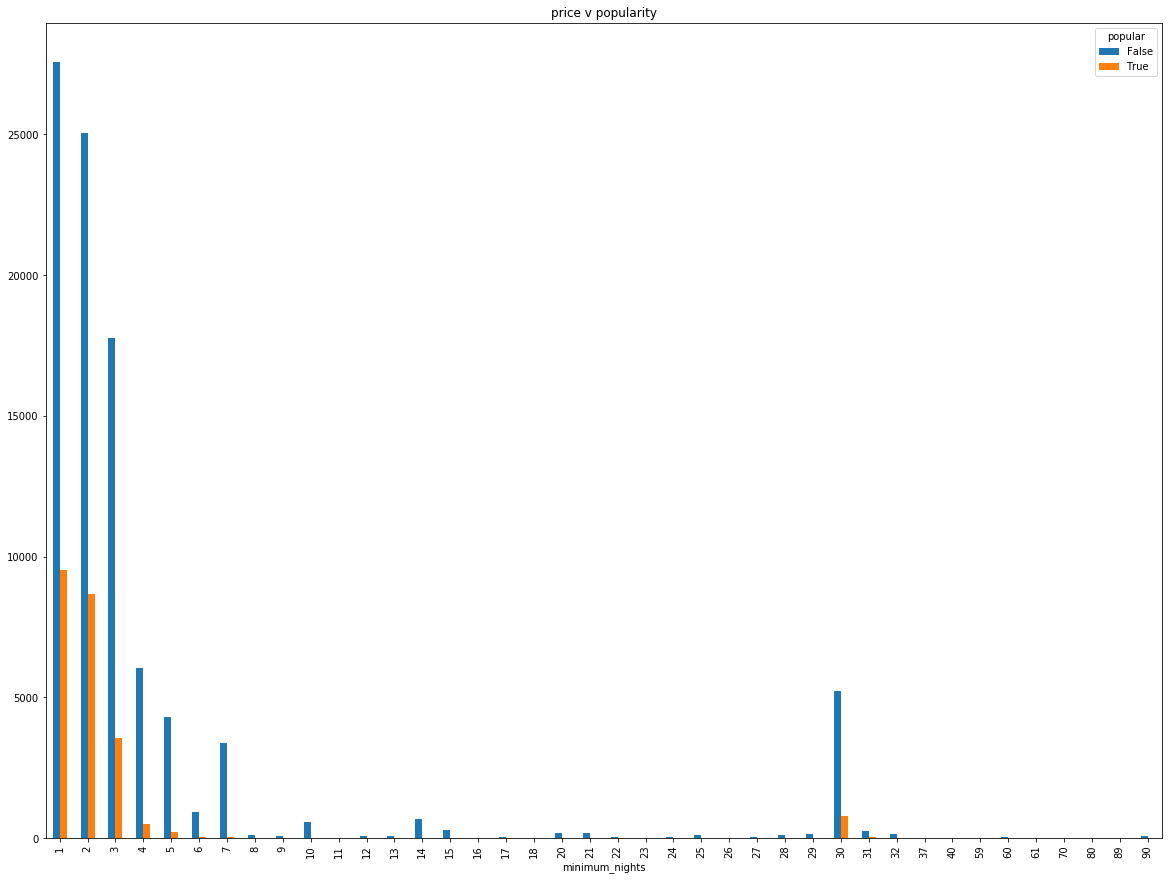

In [5]:
pd.crosstab(df_sf_2017.minimum_nights, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'price v popularity');

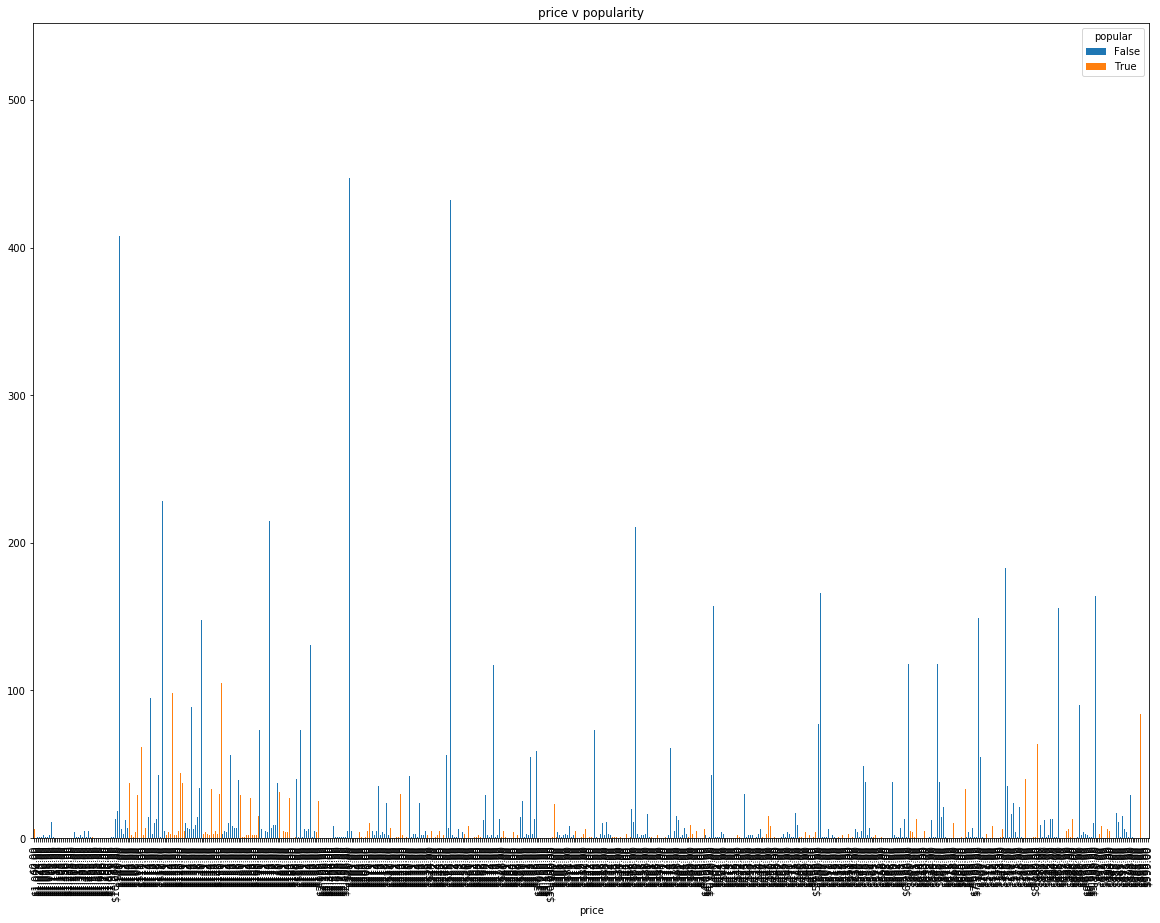

In [41]:
pd.crosstab(df_sf_2017.price, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'price v popularity');

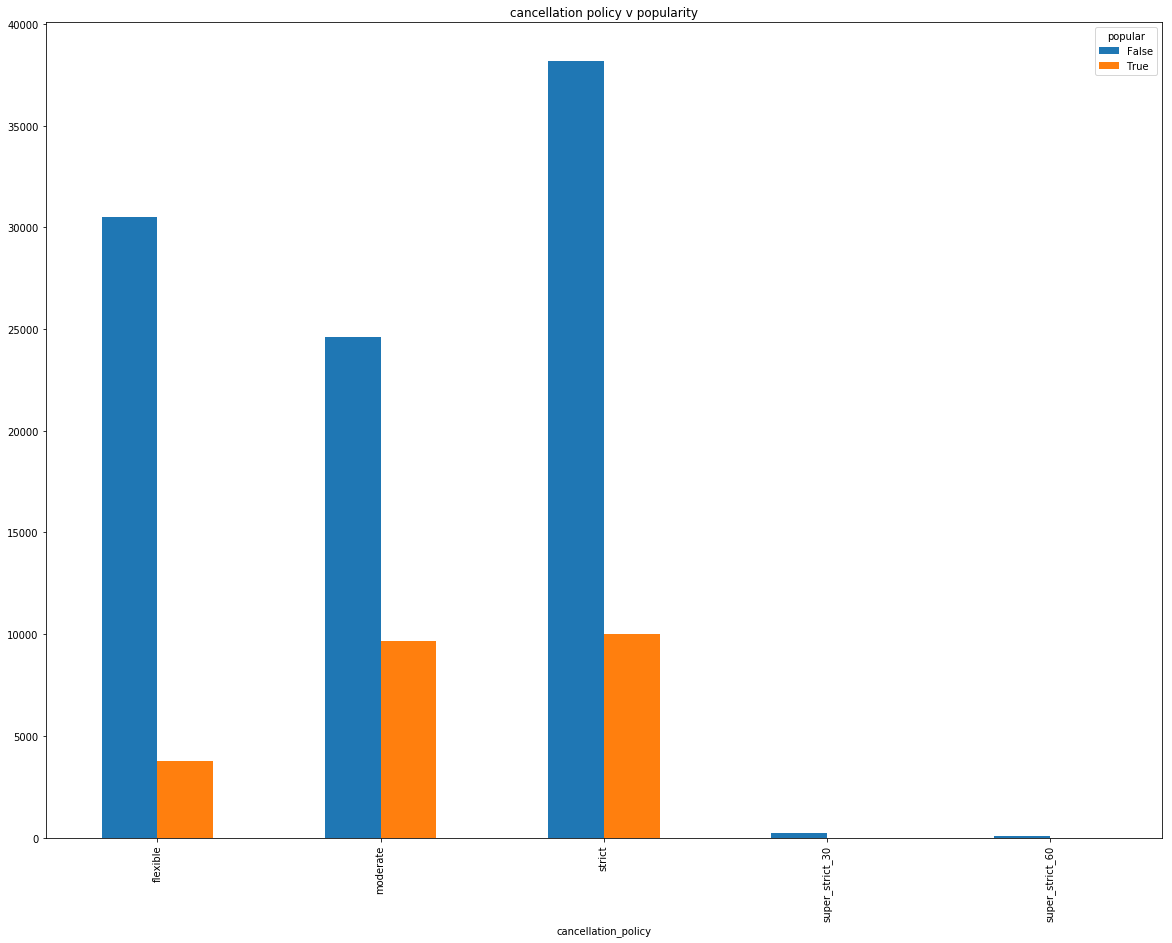

In [6]:
pd.crosstab(df_sf_2017.cancellation_policy, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'cancellation policy v popularity');

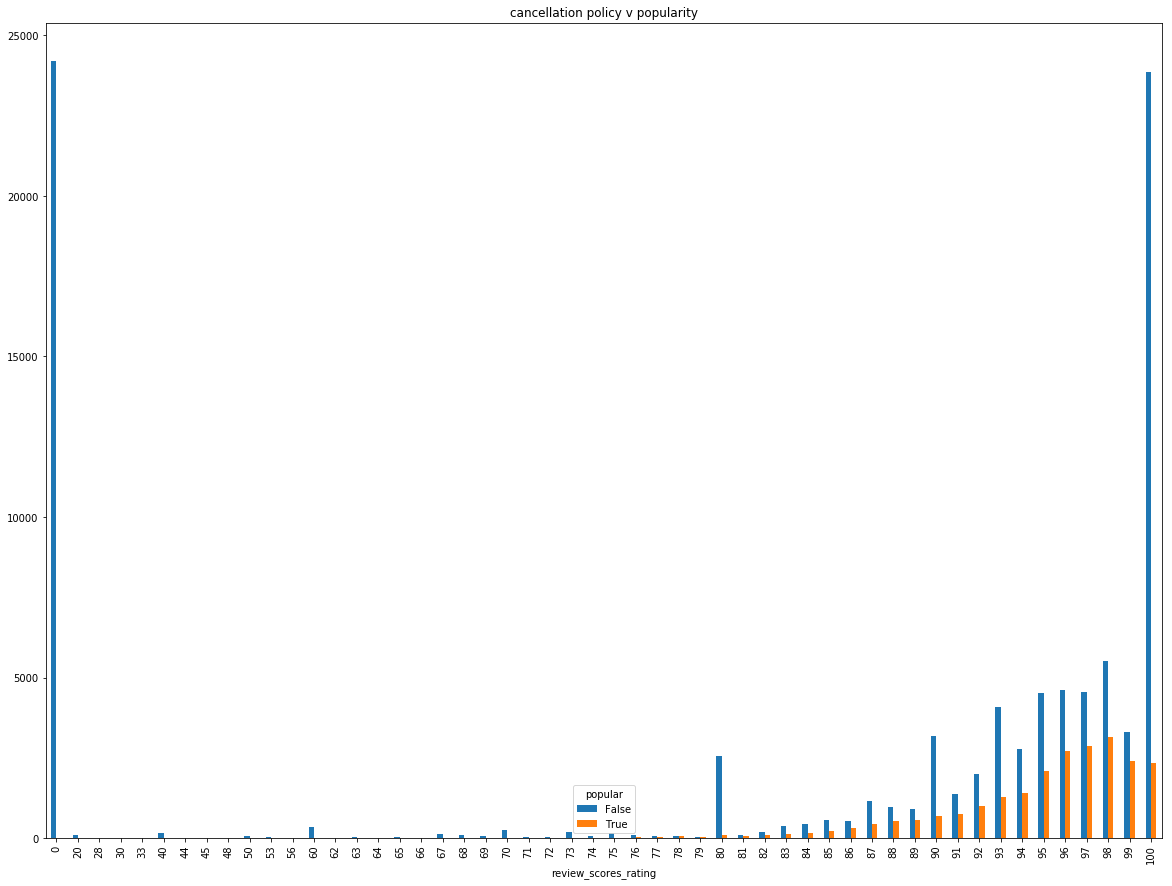

In [7]:
pd.crosstab(df_sf_2017.review_scores_rating, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'cancellation policy v popularity');

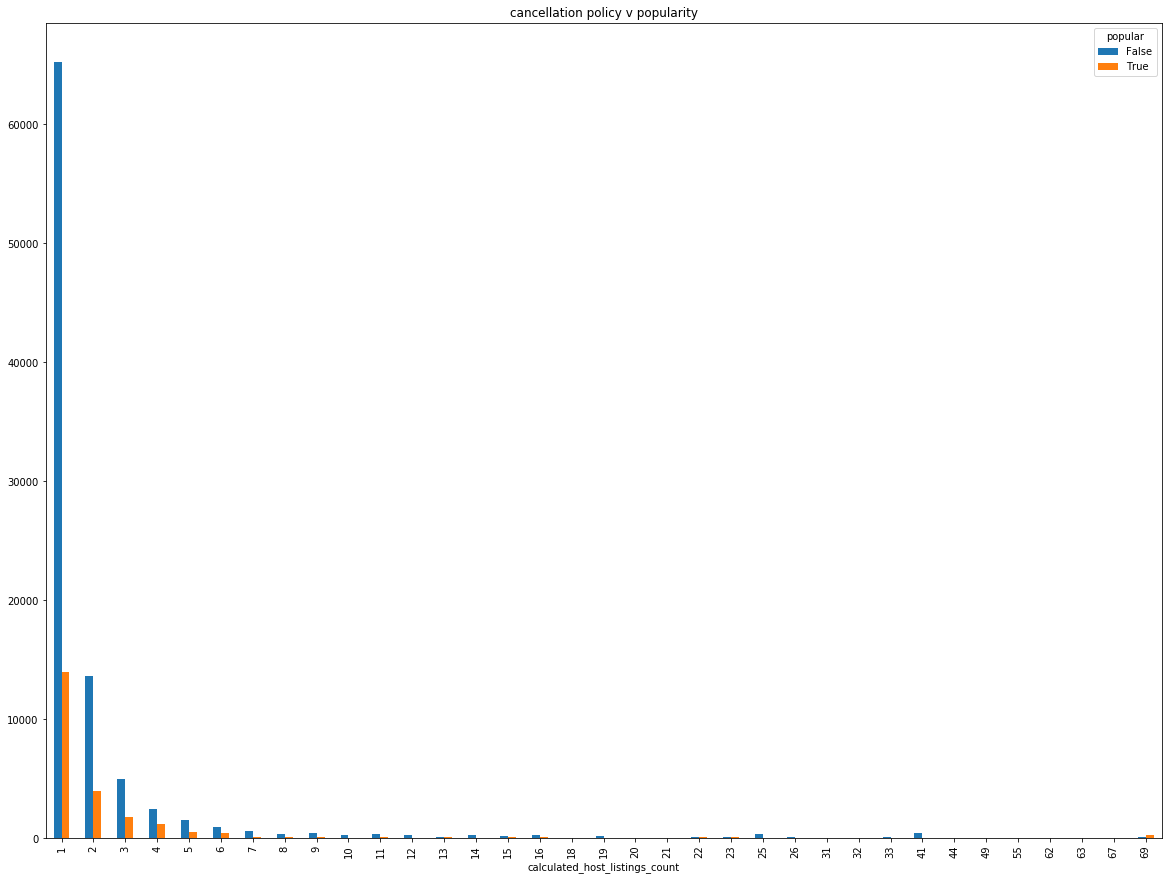

In [9]:
pd.crosstab(df_sf_2017.calculated_host_listings_count, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'cancellation policy v popularity');

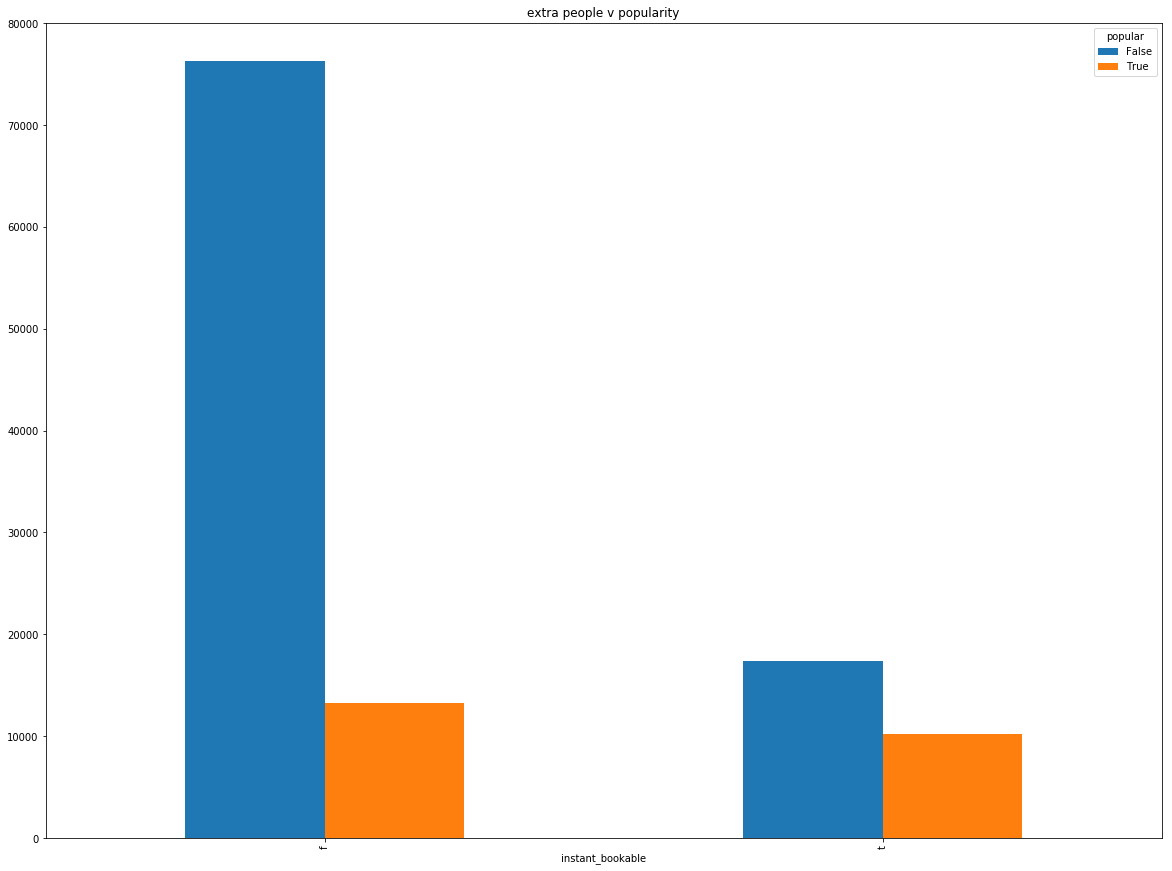

In [15]:
pd.crosstab(df_sf_2017.instant_bookable, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'extra people v popularity');

In [35]:
df_sf_2017[df_sf_2017['security_deposit'].isnull()].head(40)

,access,access_filled,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guest_per_bed,guest_per_bedroom,guests_included,has_availability,host_about,host_about_filled,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_length,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_picture_url_filled,host_response_rate,host_response_time,host_since,host_since_year,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,house_rules,house_rules_filled,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,log_price,longitude,market,maximum_nights,medium_url,minimum_nights,month,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,popular,price,price_actual,price_per_bedroom,price_per_guest,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,space_filled,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,year,zipcode
100000,You have access to the entire place - includin...,True,3,"{Internet,""Wireless Internet"",Kitchen,""Pets li...",0,0,0,0,1.0,Real Bed,1,1,3,1485993600000,4 weeks ago,moderate,San Francisco,30,United States,US,This room is perfectly located for those who e...,none,8,1.477354e+12,1.000000,1.000000,1,None,"East coast native, web developer, dog trainer",True,NaN,t,38307539,t,f,2,3.0,"San Francisco, California, United States",Tess,Noe Valley,https://a0.muscache.com/im/users/38307539/prof...,True,100,within an hour,1.436746e+12,2015,https://a0.muscache.com/im/users/38307539/prof...,3.0,https://www.airbnb.com/users/show/38307539,"['email', 'phone', 'reviews', 'kba']",None,False,11971314,f,I'm happy to help out with anything you need! ...,None,t,SAN FRANCISCO,1.483402e+12,1485993600000,37.742809,None,https://www.airbnb.com/rooms/11971314,4.812184,-122.428306,San Francisco,30,https://a0.muscache.com/im/pictures/8ec44219-e...,5,2,None,Sunny master bedroom with canopy bed,Noe Valley is my favorite neighborhood in San ...,Noe Valley,Noe Valley,NaN,"This is a 420 friendly household! However, ple...",2,https://a0.muscache.com/im/pictures/8ec44219-e...,False,93,123,4.812184,2.406092,Apartment,f,f,f,10.0,10.0,10.0,10.0,10.0,100,10.0,0.59,Private room,20170202135808,None,"San Francisco, CA",The apartment feels light and airy; it's minim...,True,NaN,CA,"29th Street, San Francisco, CA 94131, United S...",This room is perfectly located for those who e...,https://a0.muscache.com/im/pictures/8ec44219-e...,Street parking is plentiful and easy to find i...,None,https://a0.muscache.com/im/pictures/8ec44219-e...,2017,94131
100001,None,False,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,365,60,90,2.0,Real Bed,1,2,1,1485993600000,5 days ago,flexible,San Francisco,99,United States,US,Top floor with breath taking views. Easy trans...,none,0,1.411171e+12,0.500000,1.000000,1,None,I am very easy going and respectful. As an ent...,True,NaN,t,4373958,t,f,5,2.0,"San Francisco, California, United States",Carlo,Santa Cruz,https://a0.muscache.com/im/users/4373958/profi...,True,70,within a day,1.355098e+12,2012,https://a0.muscache.com/im/users/4373958/profi...,2.0,https://www.airbnb.com/users/show/4373958,"['email', 'phone', 'reviews', 'jumio']",None,False,3390866,f,None,None,t,SAN FRANCISCO,1.475712e+12,1485

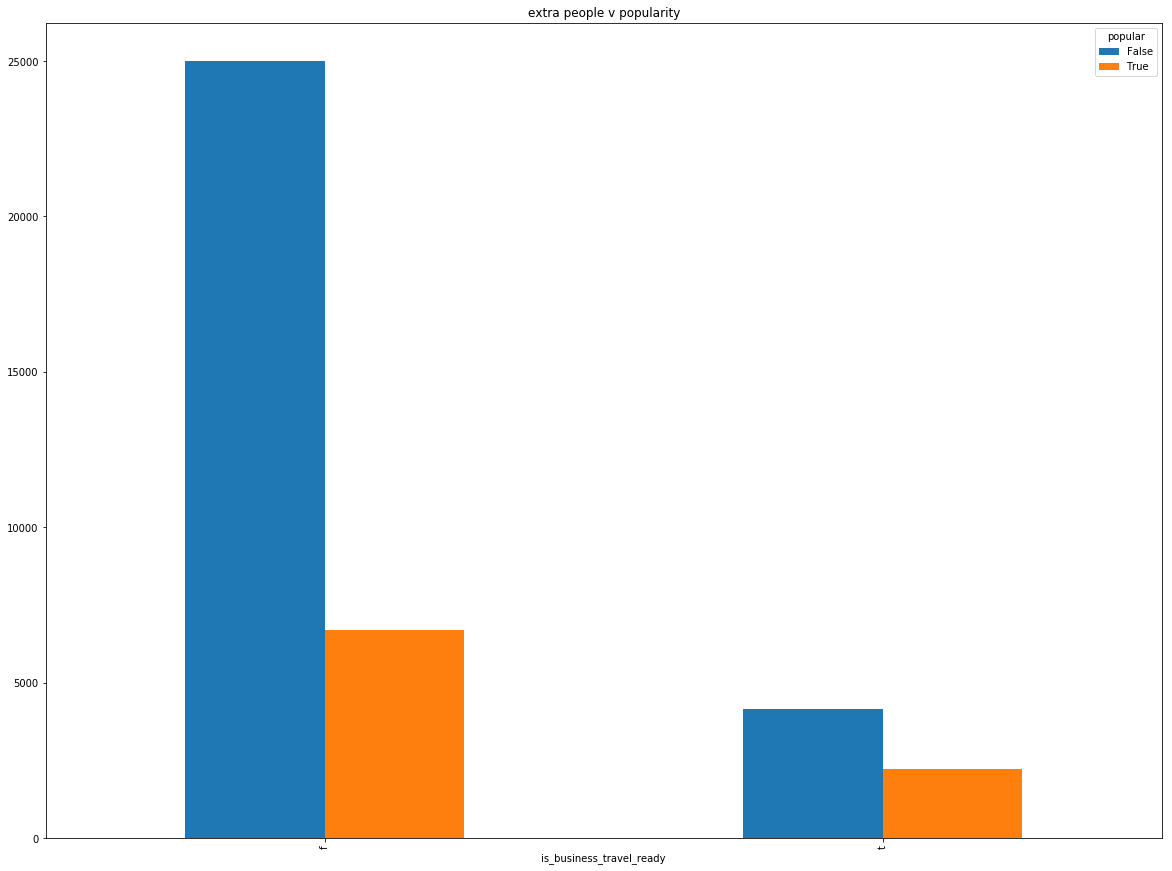

In [29]:
pd.crosstab(df_sf_2017.is_business_travel_ready, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'extra people v popularity');

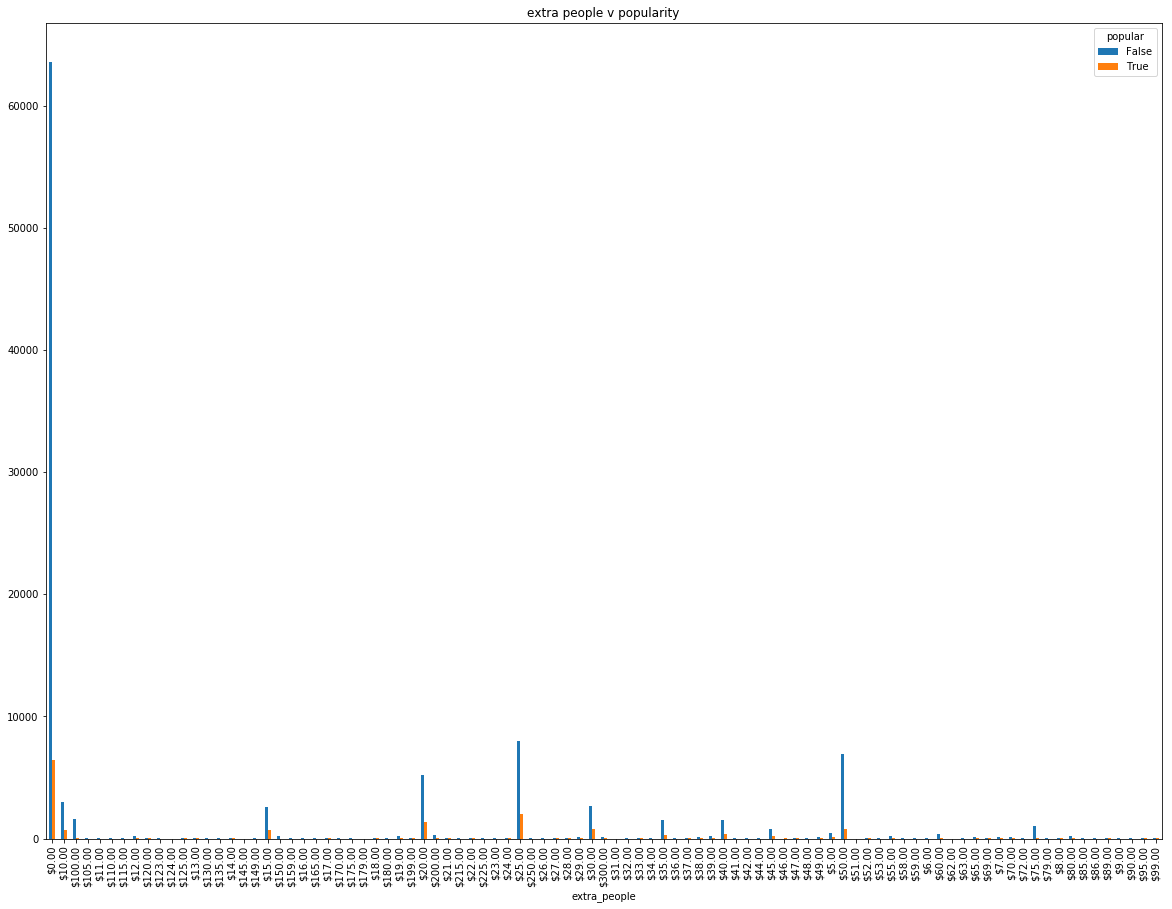

In [31]:
pd.crosstab(df_sf_2017.extra_people, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'extra people v popularity');

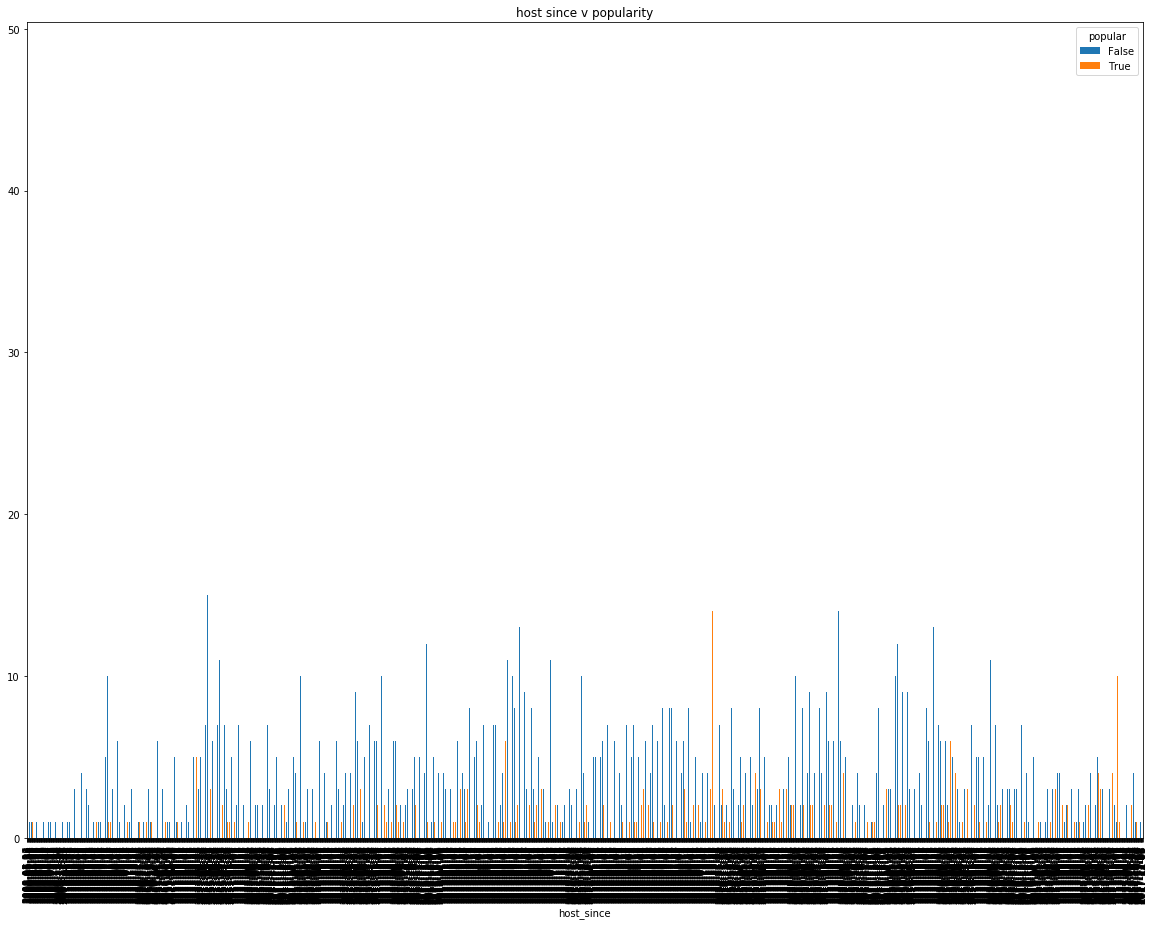

In [43]:
pd.crosstab(df_sf_2017.host_since, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host since v popularity');

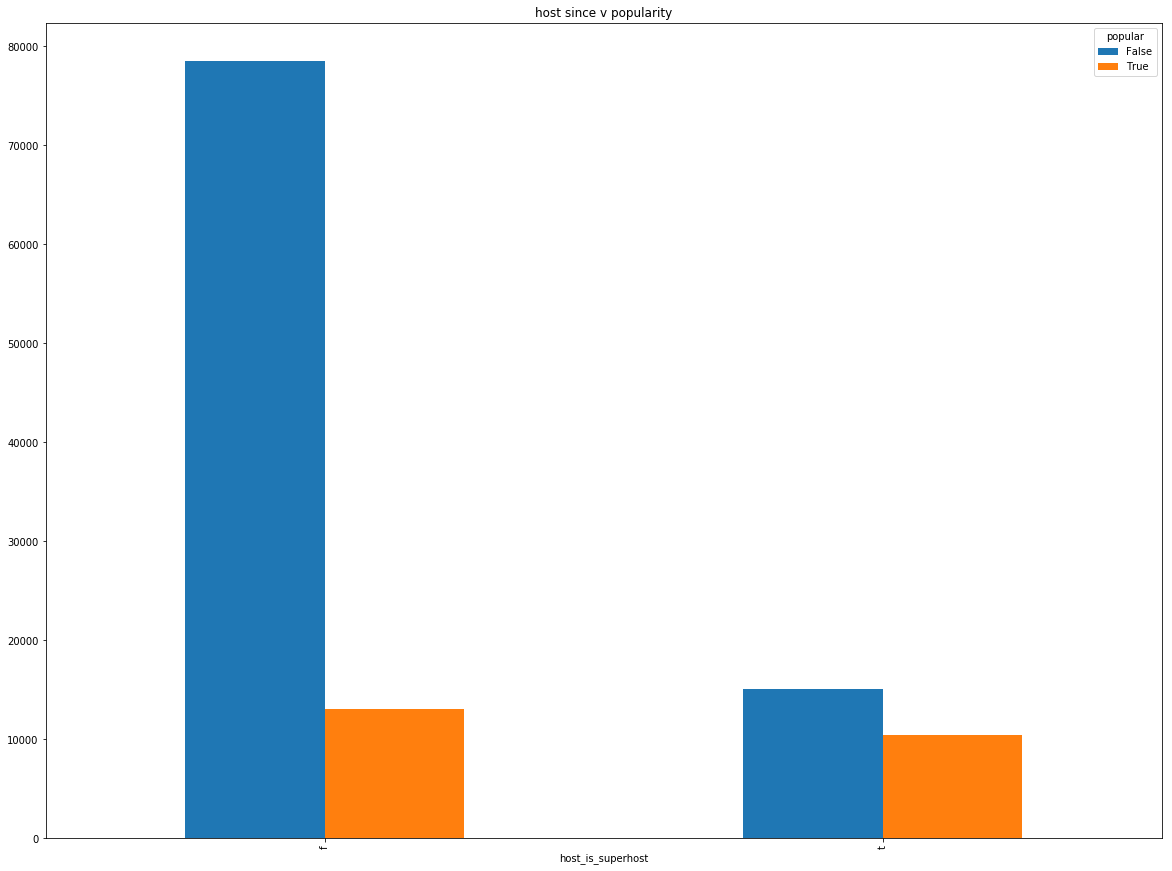

In [8]:
pd.crosstab(df_sf_2017.host_is_superhost, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host since v popularity');

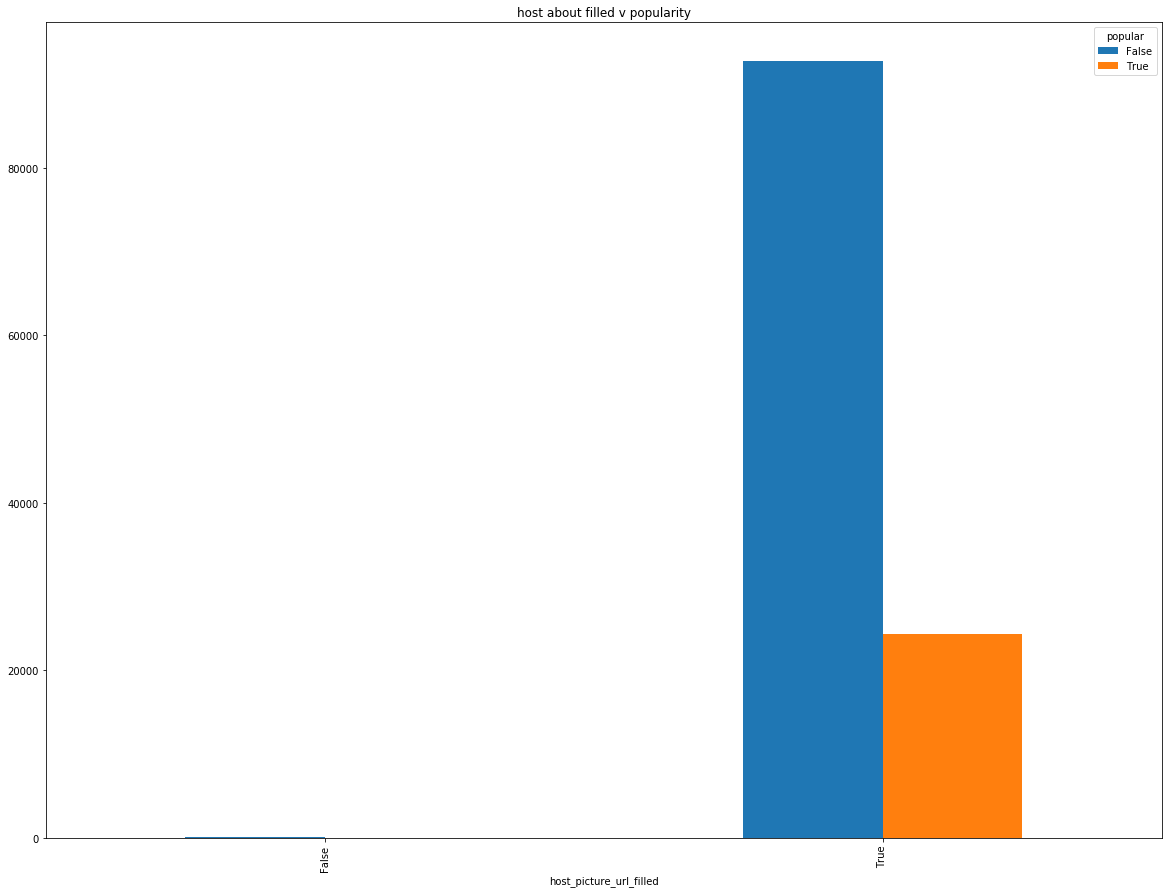

In [6]:
pd.crosstab(df_sf_2017.host_picture_url_filled, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host about filled v popularity');

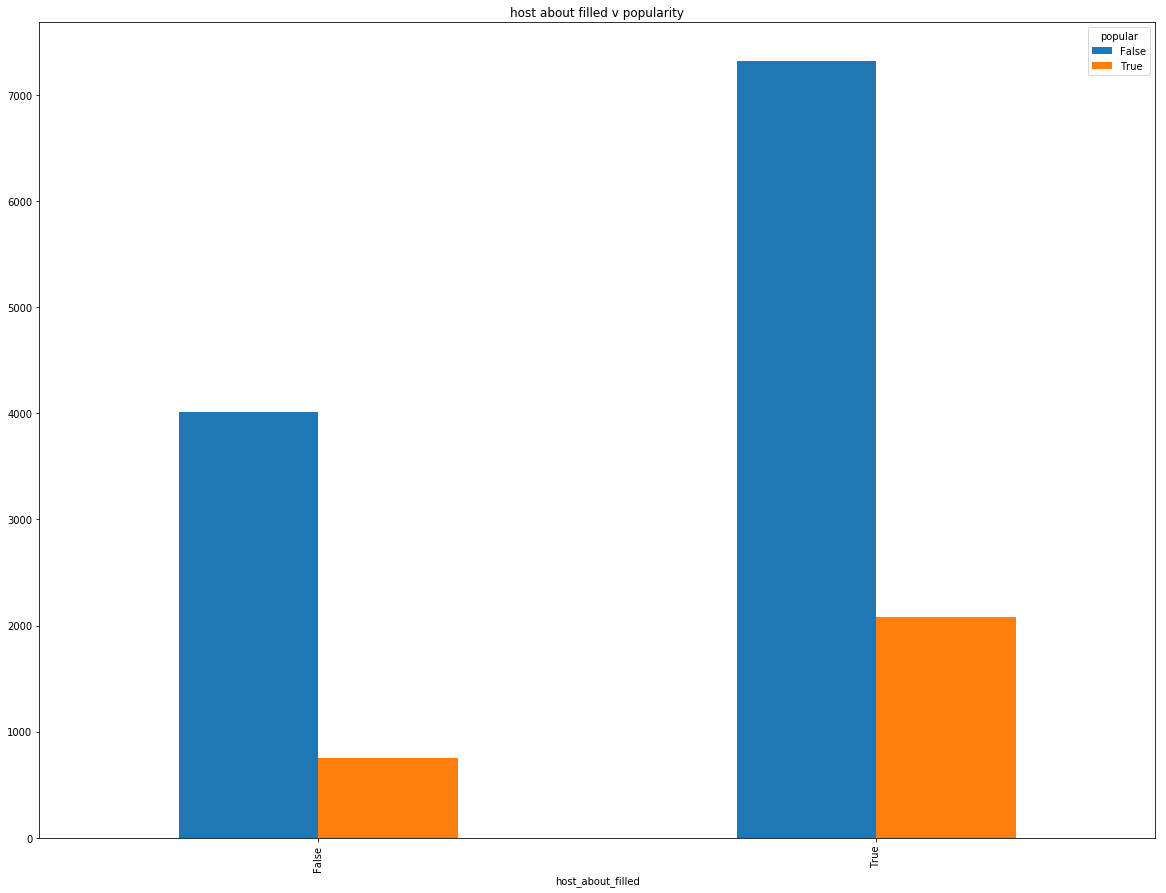

In [45]:
pd.crosstab(df_sf_2017.host_about_filled, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host about filled v popularity');

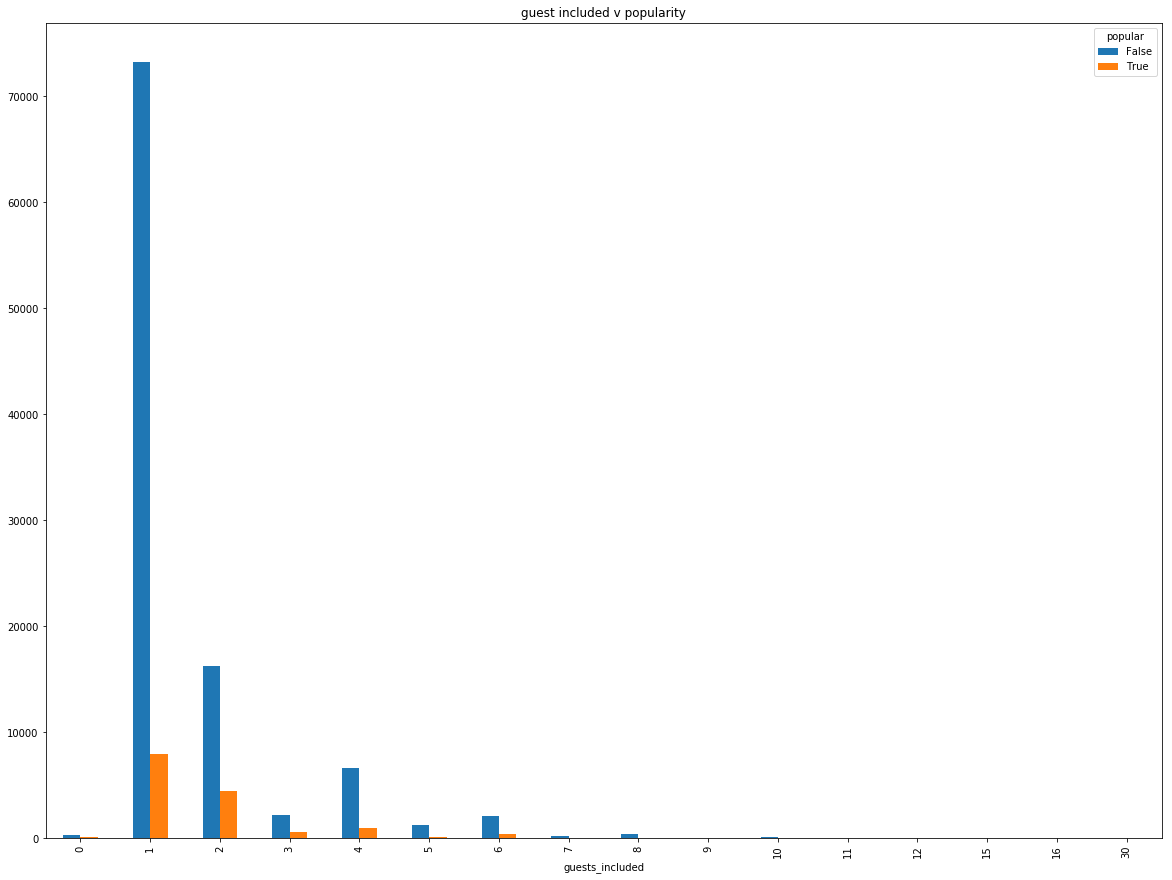

In [34]:
pd.crosstab(df_sf_2017.guests_included, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'guest included v popularity');

In [46]:
df_sf_2017.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                143
{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                                                       

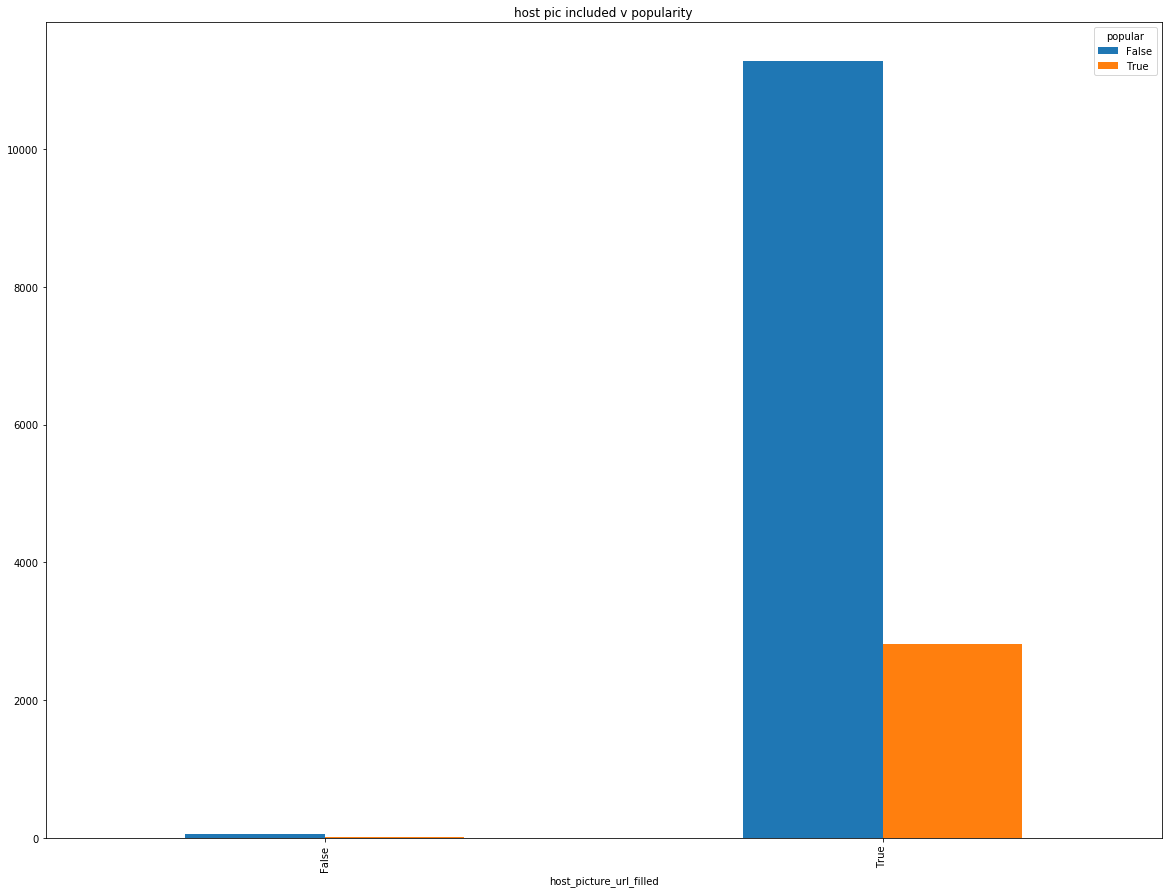

In [47]:
pd.crosstab(df_sf_2017.host_picture_url_filled, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host pic included v popularity');

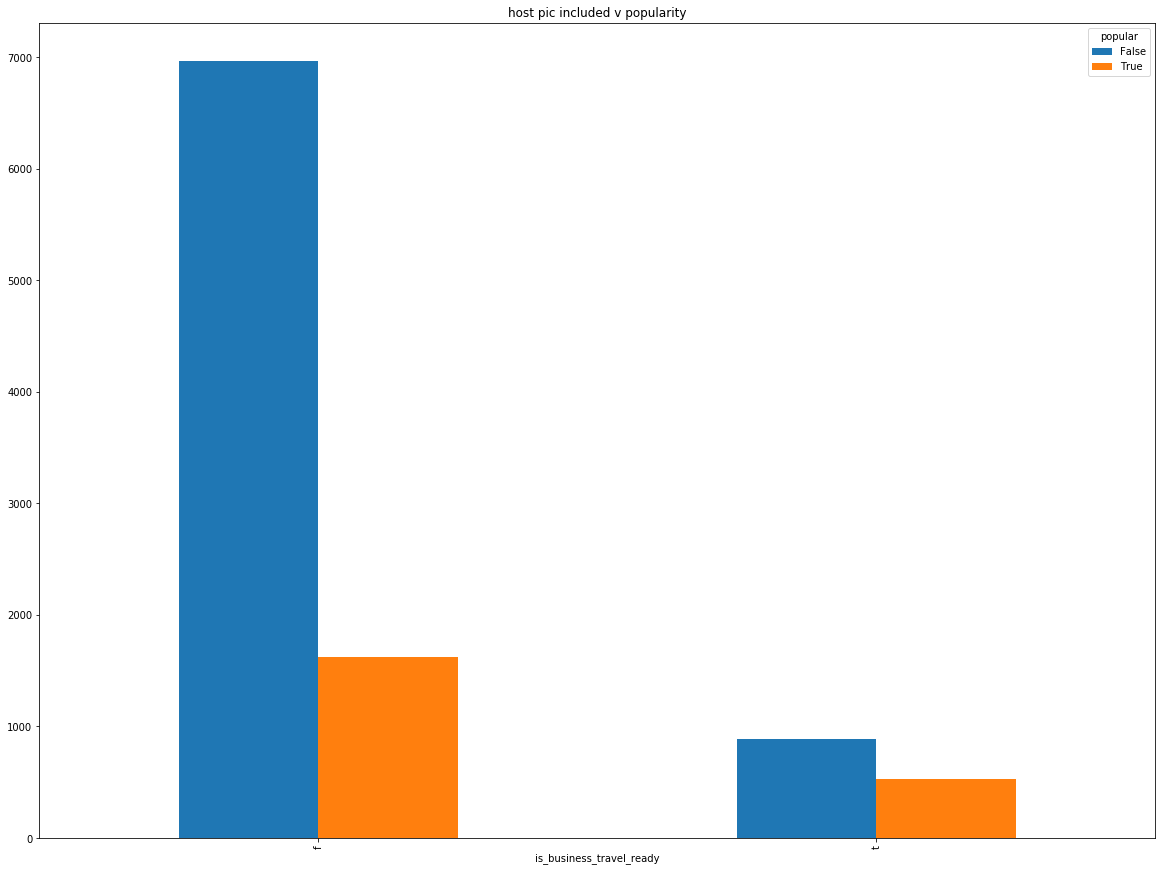

In [49]:
pd.crosstab(df_sf_2017.is_business_travel_ready, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host pic included v popularity');

In [52]:
len(df_sf_2017.monthly_price.value_counts())/len(df_sf_2017)

0.03283898305084746

In [53]:
df_sf_2017[['price', 'weekly_price', 'monthly_price']]

,price,weekly_price,monthly_price
160461,$140.00,$950.00,NaN
160452,$155.00,NaN,NaN
160438,$200.00,"$1,330.00","$4,500.00"
160440,"$1,200.00",NaN,NaN
160441,$110.00,$700.00,NaN
160496,$240.00,NaN,NaN
160492,$118.00,NaN,NaN
160465,$300.00,$695.00,NaN
160476,$97.00,$529.00,NaN
160390,$160.00,"$1,100.00",NaN
